# Convert checkpoints to pickle

Unlike the rest of this repo, this requires TF1.X and Python 3.7. It converts a TF checkpoint from MotionNet to a pickle file so we can use it in PyTorch.

In [23]:
import tensorflow as tf
#from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file

data = print_tensors_in_checkpoint_file('./results/motionNet', tensor_name='', all_tensors=False)
#get_checkpoint = tf.train.latest_checkpoint('./results/')
#inspect_list = tf.train.list_variables(get_checkpoint)
data

bconv (DT_FLOAT) [128]
bconv/Adam (DT_FLOAT) [128]
bconv/Adam_1 (DT_FLOAT) [128]
beta1_power (DT_FLOAT) []
beta2_power (DT_FLOAT) []
bout (DT_FLOAT) [64]
bout/Adam (DT_FLOAT) [64]
bout/Adam_1 (DT_FLOAT) [64]
wconv (DT_FLOAT) [6,6,6,128]
wconv/Adam (DT_FLOAT) [6,6,6,128]
wconv/Adam_1 (DT_FLOAT) [6,6,6,128]
wout (DT_FLOAT) [93312,64]
wout/Adam (DT_FLOAT) [93312,64]
wout/Adam_1 (DT_FLOAT) [93312,64]

# Total number of params: 17999426


In [77]:
import pickle
from tensorflow.python import pywrap_tensorflow

def read_checkpoint(path):
    reader = pywrap_tensorflow.NewCheckpointReader(path)
    var_to_shape_map = reader.get_variable_to_shape_map()
    the_map = {}
    for key in var_to_shape_map:
        the_map[key] = reader.get_tensor(key)
    return the_map
        
data = read_checkpoint('./results/motionNet')
data = {k: v for k, v in data.items() if 'Adam' not in k}
with open('../pretrained/motionnet.pkl', 'wb') as f:
    pickle.dump(data, f)
data['wconv'].shape

(6, 6, 6, 128)

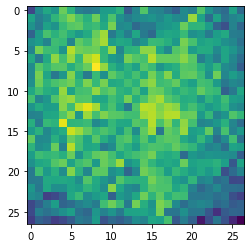

In [92]:
plt.imshow(data['wout'][:, 0].reshape((27, 27, 128))[:, :, 0])

In [100]:
import matplotlib.pyplot as plt

from matplotlib import animation
from IPython.display import HTML

def get_anim(result, norm=False):
    fig = plt.figure(figsize=(4, 4))
    ax = plt.gca()
    im = plt.imshow([[1]], cmap='gray')
    plt.axis('off')
    nt = result.shape[2]

    rg = None
    if norm:
        rg = [result.min(), result.max()]

    def drawframe(n):
        if n >= nt:
            n = nt - 1
        else:
            im.set_data(result[:, :, n])
        if norm:
            im.set_clim(rg)
        return (im)

    # blit=True re-draws only the parts that have changed.
    anim = animation.FuncAnimation(fig, drawframe, frames=nt*2, interval=100, blit=False)
    plt.close()
    return anim

anim = get_anim(data['wconv'][:, :, :, 1], norm=True).to_html5_video()
HTML(anim)